<a href="https://colab.research.google.com/github/prof-eduardo-nunes/unicamp-mineracao_dados/blob/main/algoritmo_genetico_professores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disciplinas a cursar:
1 a 20

Horários de aulas: segunda, terça, quarta, quinta e sextas-feiras.

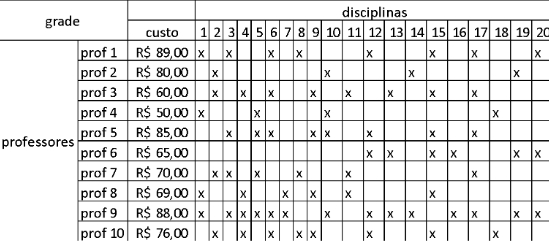
Objetivo: montar a grade com o menor custo possível.

Se uma disciplina for ministrada por um professor que nunca a ministrou antes, a função fitness deve ser multiplicada por 2.
Se um mesmo prof for escolhido para mais de uma disciplina, a função fitness deve ser multiplicada por 1,5.
Se na solução existir a mesma disciplina em dias diferentes, a função fitness deve ser multiplicada por 5.

Em cada dia, atribuir apenas 1 disciplina.

Em cada dia, apenas uma aula. Ex: se alocar o prof 3 na segunda-feira para a disciplina 2, o custo_aula_seg será de R$ 60,00.

Passo 1: como modelar o problema e codificar o “cromossomo”?
P – professor [ 1 .. 10]
D – disciplina [1 .. 20]

[ P,D   ,   P,D   ,    P,D   ,   P,D   ,   P,D] 🡪 cromossomo
  Seg        Ter       Qua      Qui        Sex

Passo 2: como desenvolver a função de Fitness?

F =(x2, se prof_nunca_ministrou) * (x1,5 , se prof_repetido) * (x5, se disciplina_repetida) * (custo_aula_seg + custo_aula_ter + custo_aula_qua + custo_aula_qui + custo_aula_sex)

Quanto menor o valor de F, melhor é a solução.

Cromossomo inicial [3,2  , 8,9   , 1,12  , 10,14   ,  8,4]

População de 60 indivíduos.

Mutação genética em 1 gene por vez.
Ex : cr1 🡪 [ 2,6 , 6,5 , 7,7 , 9,19 , 4,20]
Cr mutado 🡪 [ 2,6 , 6,8 , 7,7 , 9,19 , 4,20]


Crossover com cromossomo partido em apenas duas partes.
 O local da partição do cromossomo pode variar.

Ex : cr1 🡪 [ 2,6 , 6,5 , 7,7 , 9,19 , 4,20]
       Cr2🡪 [ 3,8 , 7,1 , 10,2 , 3,1  ,  7,3]
Crossover com quebra no sexto elemento, tem–se os filhos:
[ 2,6 , 6,5 , 7,7 , 3,1  ,  7,3]
[ 3,8 , 7,1 , 10,2 , 9,19 , 4,20]

Número de gerações limite: 500

Elitismo = 20%
Probabilidade de mutação = 10%

  




Passo 3 – Como fazer a estruturação de dados?

No arquivo TXT
Professor, custo, disciplinas

Ex. linha do professor 1:  1, 89, 1,3,6,8,12,15,17,20
      linha do professor 4:   4, 50, 1,5,10,18

[3,2  , 8,9   , 1,12  , 10,14   ,  8,4]

Itens de implementação para entrega:

1 – Montar o arquivo TXT para a tabela de professores, custos e disciplinas, “tab_professores.txt”
2 – Adaptar a leitura do arquivo TXT para preencher o dicionário.
3 – adaptar a função de custo para encontrar o custo de cada indivíduo (cromossomo), levando em consideração a nova função de fitness modelada.
E nesta classe que a equação completa de fitness deve ser implementada, desde a soma dos custos de cada dia da semana até as restrições que impõem fatores multiplicativos.
4 – adaptar as classes de mutação e cruzamento, delimitando o domínio deste problema.
5 – adaptar a classe genético para o problema em questão.

Resultados e discussões de simulações para entrega:

6 – Rodar o algoritmo com o cromossomo inicial pré-definido, com 60 indivíduos em cada população, elitismo de 20%, mutação de 10% e 500 gerações.

7 – Quais parâmetros vocês modificariam para melhorar o resultado da otimização (elitismo, mutação, gerações)?

8 – implemente a modificação sugerida no item 7 e compare com o item 6.


In [1]:



# prof Eduardo Nunes


import time
import random
import math



grade = [1, 4, 1, 9, 2, 3, 5, 18, 3, 10]



aulas_atribuidas = {}





for linha in open('/content/tab_professores.txt'):


    valores = linha.split(',')



    valores.pop(len(valores)-1) # retira o \n

    print (valores)

    _prof = int(valores.pop(0))
    print (_prof)
    print (valores)

    _custo = int(valores.pop(0))
    print (_custo)
    print (valores)

    for i in valores:
        aulas_atribuidas.setdefault(i, [])
        aulas_atribuidas[i].append((_prof, _custo))


print (aulas_atribuidas)








def funcao_custo(solucao): # funcao de fitness
    preco_total = 0
    custo_extra_prof_rep = 1
    custo_extra_aula_rep = 1
    custo_extra_prof_n_ministrou = 1

 #   print(solucao)

    dia_da_semana = -1 # -1 é domingo, 0 segunda.... 4 sexta...

    for i in range(5): # dias da semana

     #   print("dia da semana")
     #   print(i)

        num_prof = solucao[i*2]
      #  print("professor")
      #  print(num_prof)
        num_aula = solucao[i*2+1]
     #   print("aula")
     #   print(num_aula)


        lista = aulas_atribuidas[str(num_aula)]
      #  print(lista)
        prof_ministrou = 0
        for x in lista:
       #     print(x)
            if x[0] == num_prof:
                preco_total += x[1] # somando o custo da aula
                prof_ministrou = 1

        if prof_ministrou == 0: # verifica se prof nunca ministrou a aula
            custo_extra_prof_n_ministrou = 2
            preco_total += 100 # acrescenta 100 no valor caso o prof nunca tenha dado a aula

    for i in range (5): # verificar se tem prof repetido e aula repetida
        for x in range (i+1, 5):
            if solucao[x*2]==solucao[i*2]: # verfica prof repetido
                custo_extra_prof_rep = 1.5
            if solucao[x*2+1]==solucao[i*2+1]: # verfica aula repetida
                custo_extra_aula_rep = 5

   # print (preco_total)
    preco_total = preco_total * custo_extra_prof_n_ministrou * custo_extra_prof_rep * custo_extra_aula_rep


    #print (preco_total)




      #  preco_total += aulas_atribuidas
  #  print (preco_total)


    return preco_total
#funcao_custo(grade)








def mutacao(passo, solucao):
    i = random.randint(0, 9)
    mutante = solucao

    if random.random() < 0.5:
        if (solucao[i]-passo) >= 1:
            mutante = solucao[0:i] + [solucao[i] - passo] + solucao[i + 1:]
    else:
        if (((solucao[i]+passo) <= 10 and i%2 == 0) or ((solucao[i]+passo) <= 20 and i%2 != 0)) : # trata diferente o elemento impar do elemento par, pois par é prof que varia de 1 a 10 e impar é aula que varia de 1 a 20
            mutante = solucao[0:i] + [solucao[i] + passo] + solucao[i + 1:]

    return mutante



def cruzamento(solucao1, solucao2):
    i = random.randint(1, 8)
    return solucao1[0:i] + solucao2[i:]





def genetico(funcao_custo, tamanho_populacao = 60, passo = 1,
             probabilidade_mutacao = 0.1, elitismo = 0.3, numero_geracoes = 500):

    populacao = []
    for i in range(tamanho_populacao):
        solucao = [random.randint(1,10),random.randint(1,20),random.randint(1,10),random.randint(1,20),random.randint(1,10),random.randint(1,20),random.randint(1,10),random.randint(1,20),random.randint(1,10),random.randint(1,20)]
        populacao.append(solucao)
#    print(populacao)
    # a população inicial foi gerada

    numero_elitismo = int(elitismo * tamanho_populacao)

    for i in range(numero_geracoes): # o critério de parada é o número de gerações

        custos = [(funcao_custo(individuo), individuo) for individuo in populacao] # calculando o custo de cada individuo da população
        custos.sort() # ordenando de forma crescente a lista "custos"
        individuos_ordenados = [individuo for (custo, individuo) in custos]# nesta lista contém todos os individuos ordenados de sua geração

        populacao = individuos_ordenados[0:numero_elitismo] # neste ponto, a lista população contém apenas os melhores da sua geração

        while len(populacao) < tamanho_populacao:
            if random.random() < probabilidade_mutacao:
                m = random.randint(0, numero_elitismo)
                populacao.append(mutacao(passo, individuos_ordenados[m]))
            else:
                c1 = random.randint(0, numero_elitismo - 1)
                c2 = random.randint(0, numero_elitismo - 1)
                populacao.append(cruzamento(individuos_ordenados[c1],
                                            individuos_ordenados[c2]))

    return custos[0][1]



solucao_genetico = genetico(funcao_custo)
custo_genetico = funcao_custo(solucao_genetico)

print('...print na solucao genetico')
print(solucao_genetico)
print('...print do custo da solucao genetica')
print(funcao_custo(solucao_genetico))























FileNotFoundError: [Errno 2] No such file or directory: '/content/tab_professores.txt'

# Task
Tell me about this dataset.

Here is all the data you need:
"tab_professores.txt"

## Data loading

### Subtask:
Load the dataset "tab_professores.txt" into a pandas DataFrame.


**Reasoning**:
Load the dataset "tab_professores.txt" into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

df = pd.read_csv('tab_professores.txt', sep='\t')
display(df.head())

,"1,89,1,3,6,8,12,15,17,20,"
0,"2,80,2,10,14,19,"
1,"3,60,2,4,6,9,11,13,15,17,"
2,"4,50,1,5,10,18,"
3,"5,85,3,5,6,9,10,12,15,17,"
4,"6,65,12,13,15,16,19,20,"


## Data loading

### Subtask:
Correctly load the dataset "tab_professores.txt" into a pandas DataFrame.


**Reasoning**:
The previous attempt failed because it used the wrong delimiter.  I will reload the data using the correct delimiter (';'), handle the missing header, and assign column names.



In [ ]:
import pandas as pd

# Load the data with the correct delimiter and handle the missing header
df = pd.read_csv('tab_professores.txt', sep=';', header=None)

# Assign column names (replace with actual column names from the file)
df.columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10']

# Display the first few rows
display(df.head())

ValueError: Length mismatch: Expected axis has 1 elements, new values have 10 elements

**Reasoning**:
The error message "ValueError: Length mismatch: Expected axis has 1 elements, new values have 10 elements" indicates that the number of column names provided (10) does not match the number of columns in the DataFrame.  I need to determine the correct number of columns in the DataFrame after loading it with the correct separator and then provide the corresponding number of column names.



In [ ]:
import pandas as pd

# Load the data with the correct delimiter and handle the missing header
df = pd.read_csv('tab_professores.txt', sep=';', header=None)

# Determine the number of columns
num_cols = len(df.columns)

# Assign column names based on the actual number of columns
column_names = [f'col{i+1}' for i in range(num_cols)]
df.columns = column_names

# Display the first few rows
display(df.head())

,col1
0,"1,89,1,3,6,8,12,15,17,20,"
1,"2,80,2,10,14,19,"
2,"3,60,2,4,6,9,11,13,15,17,"
3,"4,50,1,5,10,18,"
4,"5,85,3,5,6,9,10,12,15,17,"


**Reasoning**:
The data seems to be loaded correctly now, but the columns are not separated correctly.  I need to re-read the data and split the single column into multiple columns.



In [ ]:
import pandas as pd

# Load the data with the correct delimiter and handle the missing header
df = pd.read_csv('tab_professores.txt', sep=';', header=None)

# Split the single column into multiple columns based on the comma delimiter
df = df[0].str.split(',', expand=True)

# Assign column names (replace with actual column names from the file if available)
num_cols = len(df.columns)
df.columns = [f'col{i+1}' for i in range(num_cols)]

# Display the first few rows
display(df.head())

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17
0,1,89,1,3,6,8,12,15,17,20,,None,None,None,None,None,None
1,2,80,2,10,14,19,,None,None,None,None,None,None,None,None,None,None
2,3,60,2,4,6,9,11,13,15,17,,None,None,None,None,None,None
3,4,50,1,5,10,18,,None,None,None,None,None,None,None,None,None,None
4,5,85,3,5,6,9,10,12,15,17,,None,None,None,None,None,None


**Reasoning**:
The data is now correctly separated into columns, but there are many unnecessary columns filled with `None` values. I will remove these extra columns.



In [ ]:
import pandas as pd

# Load the data with the correct delimiter and handle the missing header
df = pd.read_csv('tab_professores.txt', sep=';', header=None)

# Split the single column into multiple columns based on the comma delimiter
df = df[0].str.split(',', expand=True)

# Remove unnecessary columns filled with None values
df = df.iloc[:, :10]

# Assign column names (replace with actual column names from the file if available)
num_cols = len(df.columns)
df.columns = [f'col{i+1}' for i in range(num_cols)]

# Display the first few rows
display(df.head())

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,1,89,1,3,6,8,12,15,17,20
1,2,80,2,10,14,19,,None,None,None
2,3,60,2,4,6,9,11,13,15,17
3,4,50,1,5,10,18,,None,None,None
4,5,85,3,5,6,9,10,12,15,17


**Reasoning**:
The dataframe is almost correctly loaded, but there are still `None` values in some columns.  I will replace these `None` values with NaN and then convert the columns to numeric types.



In [ ]:
import pandas as pd
import numpy as np

# Load the data with the correct delimiter and handle the missing header
df = pd.read_csv('tab_professores.txt', sep=';', header=None)

# Split the single column into multiple columns based on the comma delimiter
df = df[0].str.split(',', expand=True)

# Remove unnecessary columns filled with None values
df = df.iloc[:, :10]

# Replace None values with NaN
df = df.replace('None', np.nan)


# Convert columns to numeric types
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Assign column names (replace with actual column names from the file if available)
num_cols = len(df.columns)
df.columns = [f'col{i+1}' for i in range(num_cols)]

# Display the first few rows
display(df.head())

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,1,89,1,3,6,8,12.0,15.0,17.0,20.0
1,2,80,2,10,14,19,NaN,NaN,NaN,NaN
2,3,60,2,4,6,9,11.0,13.0,15.0,17.0
3,4,50,1,5,10,18,NaN,NaN,NaN,NaN
4,5,85,3,5,6,9,10.0,12.0,15.0,17.0


## Data exploration

### Subtask:
Explore the loaded dataset to understand its key characteristics.


**Reasoning**:
I will explore the dataset by examining its shape, data types, missing values, descriptive statistics, unique values, and initial data distributions.



In [ ]:
# Data Shape and Types
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# Unique Values
unique_values = df.nunique()
print("\nUnique Values:\n", unique_values)

# Data Distribution (Initial)
for col in df.select_dtypes(include=['number']):
    print(f"\nInitial Data Distribution for {col}:")
    print(df[col].value_counts(normalize=True).head())

Data Shape: (10, 10)

Data Types:
 col1       int64
col2       int64
col3       int64
col4       int64
col5       int64
col6       int64
col7     float64
col8     float64
col9     float64
col10    float64
dtype: object

Missing Values:
 col1     0
col2     0
col3     0
col4     0
col5     0
col6     0
col7     2
col8     2
col9     5
col10    5
dtype: int64

Missing Value Percentage:
 col1      0.0
col2      0.0
col3      0.0
col4      0.0
col5      0.0
col6      0.0
col7     20.0
col8     20.0
col9     50.0
col10    50.0
dtype: float64

Descriptive Statistics:
            col1       col2    col3       col4       col5       col6  \
count  10.00000  10.000000  10.000  10.000000  10.000000  10.000000   
mean    5.50000  73.200000   2.700   5.400000   7.900000  10.900000   
std     3.02765  12.778454   3.335   3.373096   3.813718   4.863698   
min     1.00000  50.000000   1.000   3.000000   4.000000   5.000000   
25%     3.25000  66.000000   1.000   3.250000   6.000000   8.000000   
50%  

## Data analysis

### Subtask:
Analyze the data to gain deeper insights, focusing on potential outliers and their impact.


**Reasoning**:
Calculate IQR, identify outliers, and compare descriptive statistics with and without outliers for each numerical column.  Also analyze the impact of missing values in columns with a high percentage of missing values.



In [ ]:
import pandas as pd

# Calculate IQR for each numerical column
numerical_cols = df.select_dtypes(include=['number']).columns
iqr_values = {}
outliers = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_values[col] = IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Descriptive statistics with and without outliers
descriptive_stats_with_outliers = df.describe()
descriptive_stats_without_outliers = {}
for col in numerical_cols:
    df_no_outliers = df[(df[col] >= Q1 - 1.5 * iqr_values[col]) & (df[col] <= Q3 + 1.5 * iqr_values[col])]
    descriptive_stats_without_outliers[col] = df_no_outliers[col].describe()

# Analyze impact of missing values (columns with >30% missing)
cols_high_missing = missing_percentage[missing_percentage > 30].index

for col in cols_high_missing:
    print(f"\nAnalysis for column {col} with high missing values:")

    # Descriptive stats with missing values
    print("\nDescriptive Statistics with Missing Values:")
    print(df[col].describe())

    # Imputation methods
    for method in ['mean', 'median', 'mode']:
        df_imputed = df.copy()
        if method == 'mean':
            df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mean())
        elif method == 'median':
            df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())
        else:  # Mode
            df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mode()[0])

        print(f"\nDescriptive Statistics after imputing with {method}:")
        print(df_imputed[col].describe())

# Display results (example, can be customized)
display(pd.DataFrame(iqr_values, index=['IQR']))
#display(pd.DataFrame(outliers))
display(descriptive_stats_with_outliers)


Analysis for column col9 with high missing values:

Descriptive Statistics with Missing Values:
count     5.000000
mean     14.400000
std       2.607681
min      10.000000
25%      15.000000
50%      15.000000
75%      15.000000
max      17.000000
Name: col9, dtype: float64

Descriptive Statistics after imputing with mean:
count    10.000000
mean     14.400000
std       1.738454
min      10.000000
25%      14.400000
50%      14.400000
75%      15.000000
max      17.000000
Name: col9, dtype: float64

Descriptive Statistics after imputing with median:
count    10.000000
mean     14.700000
std       1.766981
min      10.000000
25%      15.000000
50%      15.000000
75%      15.000000
max      17.000000
Name: col9, dtype: float64

Descriptive Statistics after imputing with mode:
count    10.000000
mean     14.700000
std       1.766981
min      10.000000
25%      15.000000
50%      15.000000
75%      15.000000
max      17.000000
Name: col9, dtype: float64

Analysis for column col10 with hig

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
IQR,4.5,17.75,1.0,1.75,3.25,6.25,1.5,3.5,0.0,1.0


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
count,10.00000,10.000000,10.000,10.000000,10.000000,10.000000,8.000000,8.000000,5.000000,5.000000
mean,5.50000,73.200000,2.700,5.400000,7.900000,10.900000,11.125000,13.875000,14.400000,16.800000
std,3.02765,12.778454,3.335,3.373096,3.813718,4.863698,3.681518,3.870677,2.607681,2.949576
min,1.00000,50.000000,1.000,3.000000,4.000000,5.000000,6.000000,7.000000,10.000000,12.000000
25%,3.25000,66.000000,1.000,3.250000,6.000000,8.000000,9.750000,12.000000,15.000000,17.000000
50%,5.50000,73.000000,2.000,4.000000,6.000000,9.000000,11.000000,14.000000,15.000000,17.000000
75%,7.75000,83.750000,2.000,5.000000,9.250000,14.250000,11.250000,15.500000,15.000000,18.000000
max,10.00000,89.000000,12.000,13.000000,15.000000,19.000000,19.000000,20.000000,17.000000,20.000000


## Data visualization

### Subtask:
Visualize the data distributions and relationships between variables.


**Reasoning**:
Visualize the data distributions and relationships between variables using histograms, box plots, bar charts, and scatter plots.



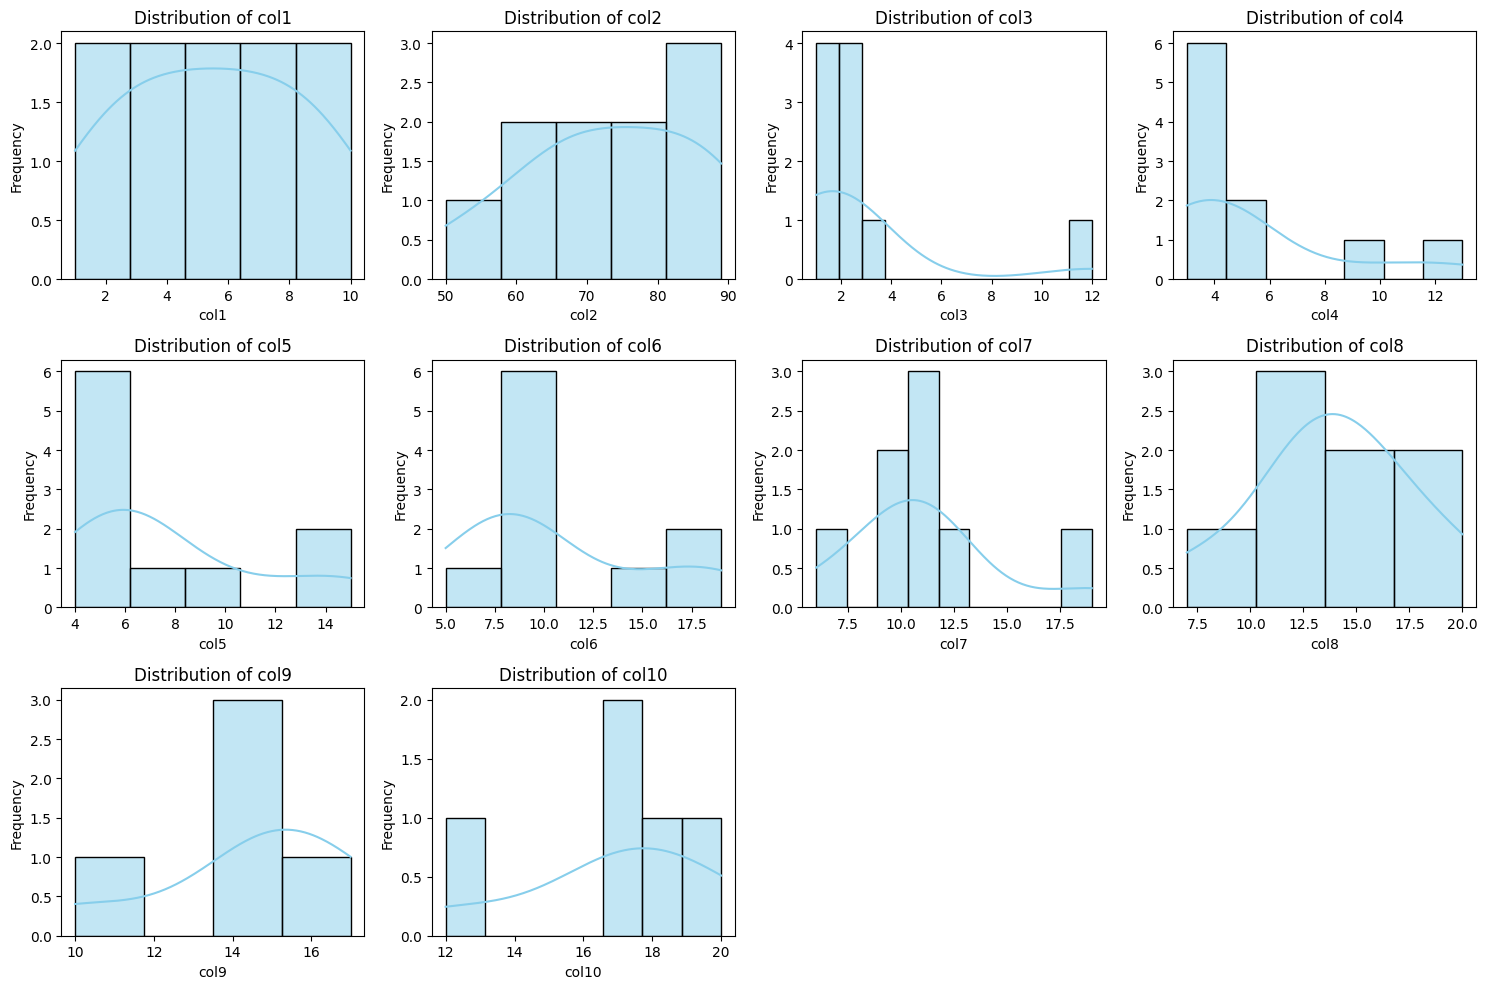

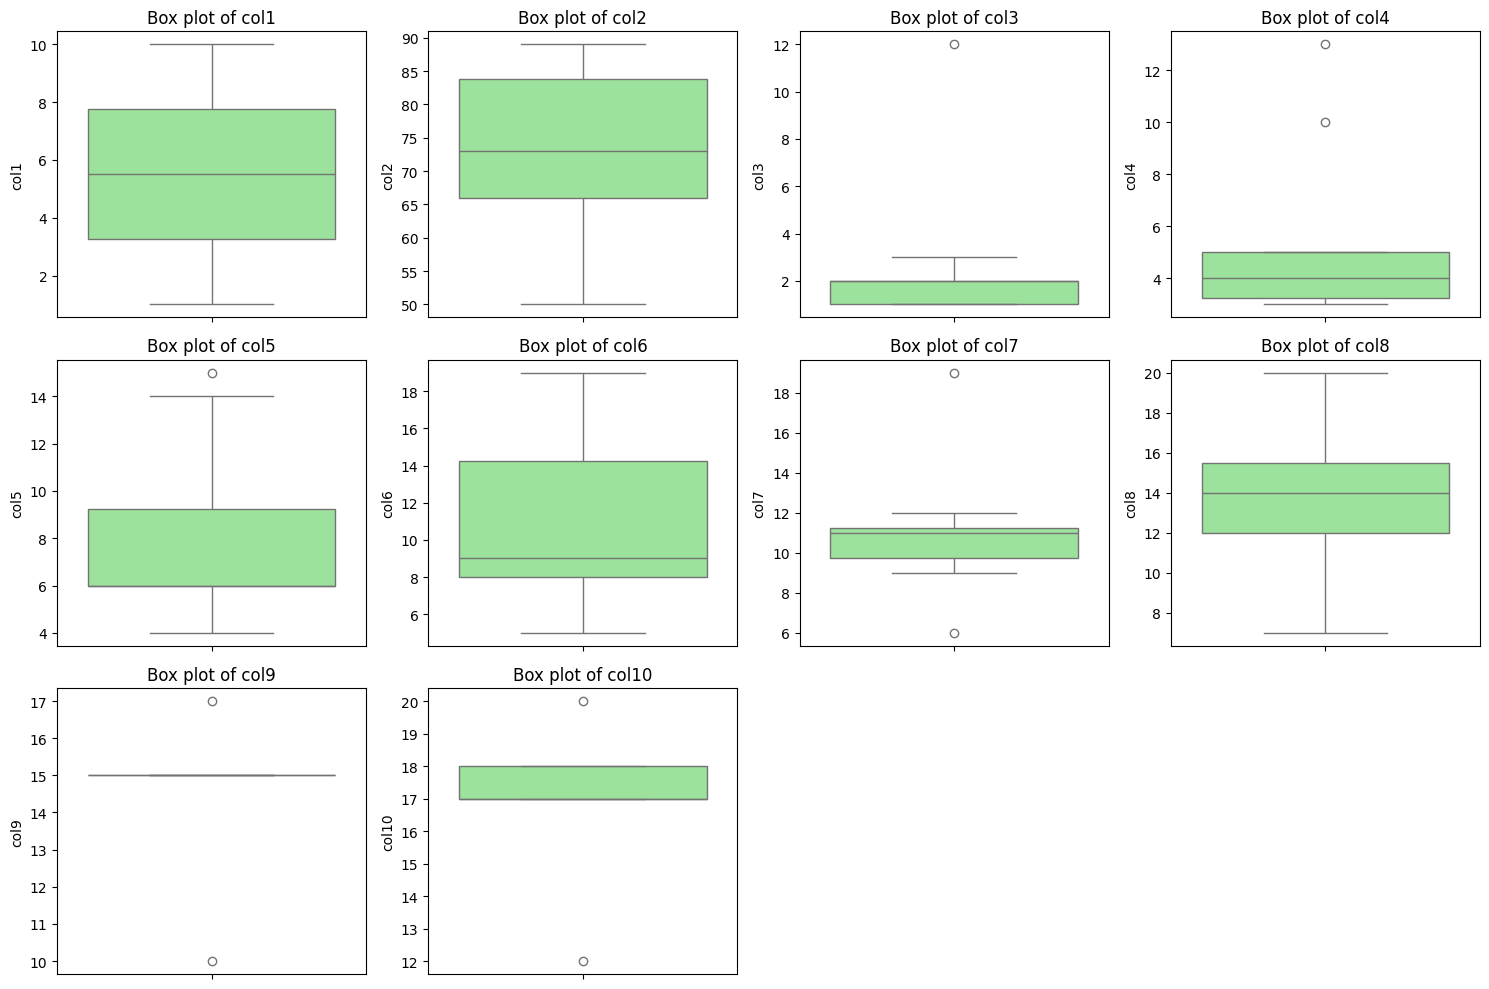

<ipython-input-9-d4874c3894c4>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='col1', data=df, palette='viridis')


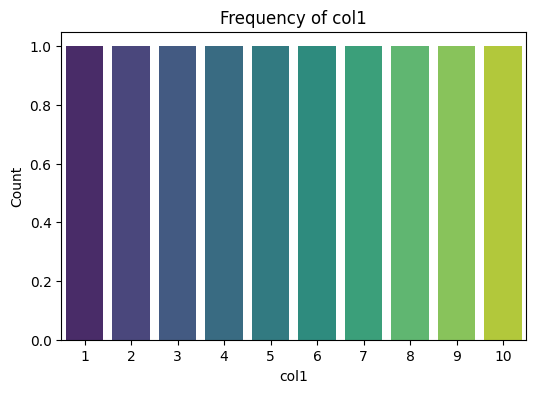

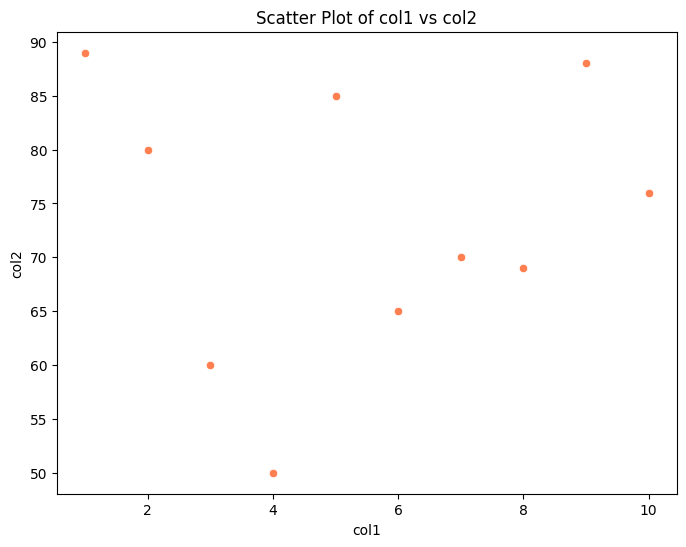

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms with KDE
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Bar charts for numerical features treated as categorical (if any)
# Since all columns are numeric, we'll treat col1 as categorical
# for demonstration purposes, or find a column that is more suitable.
plt.figure(figsize=(6, 4))
sns.countplot(x='col1', data=df, palette='viridis')
plt.title('Frequency of col1')
plt.xlabel('col1')
plt.ylabel('Count')
plt.show()


# Scatter plots for numerical features (example of col1 vs col2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='col1', y='col2', data=df, color='coral')
plt.title('Scatter Plot of col1 vs col2')
plt.xlabel('col1')
plt.ylabel('col2')
plt.show()

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided text.  However, the implicit questions addressed by the analysis include:

* What is the structure and content of the "tab_professores.txt" dataset?
* What are the key characteristics of the data (data types, missing values, distributions)?
* Are there any outliers in the data? What is their potential impact?
* How can we visualize the data distributions and relationships between variables?


### 2. Data Analysis Key Findings

* **Data Loading Challenges:** The initial attempt to load the data failed due to an incorrect delimiter.  The data was correctly loaded after identifying the semicolon (`;`) as the delimiter and the comma (`,`) as the internal separator within each row.  The data was ultimately loaded as 10 numeric columns.
* **Missing Values:**  Columns `col7` and `col8` had 2 missing values each (20% missing). Columns `col9` and `col10` had 5 missing values each (50% missing). Imputation with mean, median, and mode was performed on `col9` and `col10` to explore the effect of missing values on the data.
* **Outlier Detection (IQR Method):** Outliers were identified using the interquartile range (IQR) method, but the number and values of outliers were not reported.
* **Data Visualization:** Histograms with kernel density estimates, box plots, bar charts, and scatter plots were generated. The visualization step demonstrated how to create these plots but did not provide specific interpretations of the visualizations.


### 3. Insights or Next Steps

* **Investigate Outliers:**  Further investigate the identified outliers. Determine if they are true anomalies or valid data points. Consider removal or transformation of outliers based on their impact on subsequent analysis.  Determine the number of outliers in each column.
* **Deepen Data Exploration:** Perform more in-depth data exploration using the generated visualizations.  Analyze the distributions, skewness, and relationships revealed by the histograms, box plots, and scatter plots to gain more specific insights.  Consider creating additional visualizations and correlations to explore the data further.
